**so this implementation is the practice for implementation in the `fundamental of deep learning book`**

In [38]:
import torch


In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [40]:

!nvidia-smi

Mon Oct 21 15:42:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [41]:
device

'cuda'

In [42]:
x = torch.tensor(4.0,requires_grad=True,device=device)
y = torch.tensor(2.0,requires_grad=True,device=device)
z = torch.tensor(1.0,requires_grad=True,device=device)

In [43]:
f = x**2 + y**3 + z**3
f.backward()

In [11]:
x.grad,y.grad,z.grad

(tensor(8., device='cuda:0'),
 tensor(12., device='cuda:0'),
 tensor(3., device='cuda:0'))

In [12]:
x.device

device(type='cuda', index=0)

In [3]:
import torchvision.datasets
from torchvision.transforms import ToTensor

In [5]:
train_set = torchvision.datasets.MNIST('mnist',train=True,transform=ToTensor(),download=True)
test_set = torchvision.datasets.MNIST('mnist',train=False,transform=ToTensor(),download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 12914234.25it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 347869.16it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:02<00:00, 692231.46it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3591728.65it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [21]:
len(train_set),len(test_set)

(60000, 10000)

Image shape: torch.Size([1, 28, 28])


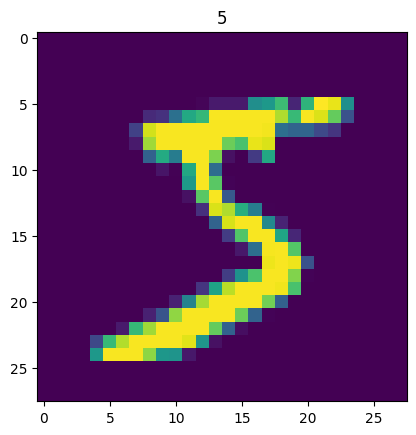

In [22]:
import matplotlib.pyplot as plt
image, label = train_set[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

In [30]:
image.squeeze().shape,label

(torch.Size([28, 28]), 5)

In [6]:
import torch.utils.data

In [32]:
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True )
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


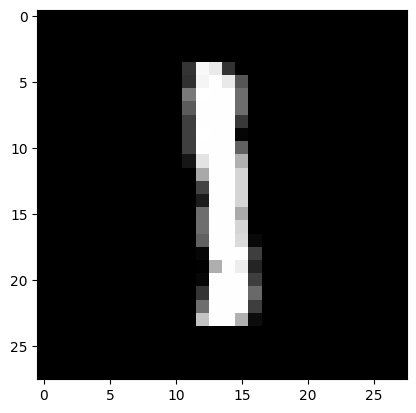

Label: 1


In [35]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [44]:
device

'cuda'

In [36]:
import torch.nn as nn

In [64]:
import numpy as np

In [122]:
class ModelOMG(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.classifier = nn.Sequential(

        nn.Linear(input_shape,512),
        nn.LeakyReLU(),
        nn.Linear(512,output_shape),
    )

  def forward(self, x):
    x = x.view(x.size(0), -1)
    out = self.classifier(x)
    return out
input_shape = 28*28
output_shape = 10
model = ModelOMG(input_shape,output_shape).to(device)
model

ModelOMG(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [123]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [124]:
from tqdm import tqdm

In [125]:
# training the model
epochs = 100
losses = []
for epoch in tqdm(range(epochs)):
    trainloss = 0
    model.train()
    for img, label in train_dataloader:
        output = model(img.to(device))
        loss = loss_fn(output, label.to(device))
        trainloss += loss.item()  # Accumulate loss per batch

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Store average loss per epoch
    avg_train_loss = trainloss / len(train_dataloader)
    losses.append(avg_train_loss)

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"epoch:{epoch+1} | loss={avg_train_loss}")


 10%|█         | 10/100 [01:22<11:52,  7.91s/it]

epoch:10 | loss=0.10956859198928044


 20%|██        | 20/100 [02:40<10:29,  7.87s/it]

epoch:20 | loss=0.09984501958716584


 30%|███       | 30/100 [03:58<09:06,  7.81s/it]

epoch:30 | loss=0.09752474055309206


 40%|████      | 40/100 [05:15<07:41,  7.68s/it]

epoch:40 | loss=0.07859612111769164


 50%|█████     | 50/100 [06:31<06:20,  7.61s/it]

epoch:50 | loss=0.07159002648963084


 60%|██████    | 60/100 [07:51<05:31,  8.30s/it]

epoch:60 | loss=0.07656127284729726


 70%|███████   | 70/100 [09:10<03:52,  7.75s/it]

epoch:70 | loss=0.09239704462229628


 80%|████████  | 80/100 [10:31<02:44,  8.21s/it]

epoch:80 | loss=0.04361678281354142


 90%|█████████ | 90/100 [11:52<01:19,  7.94s/it]

epoch:90 | loss=0.06154487663257913


100%|██████████| 100/100 [13:09<00:00,  7.90s/it]

epoch:100 | loss=0.07854077191347503


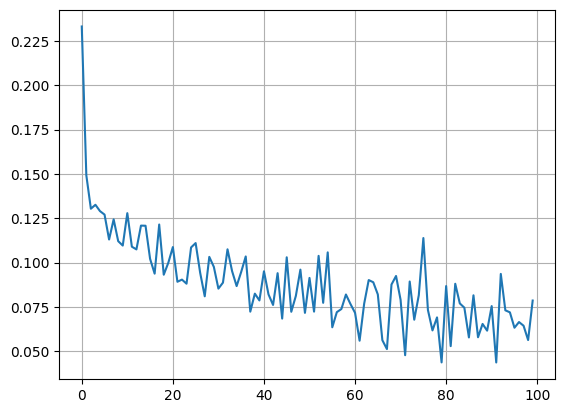

In [126]:
plt.figure()
plt.plot(losses)
plt.grid()
plt.show()

In [135]:
accuracy = 0.0
computed_loss = 0.0
total_samples = 0

model.eval()
with torch.no_grad():
    for data, target in test_dataloader:
        data = data.to(device).flatten(start_dim=1)  # Move data to GPU and flatten
        target = target.to(device)  # Move target to GPU

        # Forward pass
        out = model(data)

        # Predicted class
        _, preds = out.max(dim=1)

        # Calculate loss for the batch and accumulate it
        loss = loss_fn(out, target)
        computed_loss += loss.item() * data.size(0)  # Multiply loss by the batch size

        # Calculate accuracy
        accuracy += torch.sum(preds == target).item()  # Count correct predictions
        total_samples += data.size(0)  # Accumulate total samples

# Average loss and accuracy across all batches
computed_loss /= total_samples
accuracy = (accuracy / total_samples) * 100

print(f"Test loss: {computed_loss:.4f} | Test accuracy: {accuracy:.2f}%")


Test loss: 3.1091 | Test accuracy: 97.85%


### **got better accuracy then the model in the book**

### an example on scikit learn digits dataset 

In [1]:
import torch 
import torch.nn as nn 
import numpy 
import sklearn 

In [2]:
from sklearn.datasets import load_digits 

In [3]:
x, y = load_digits(return_X_y=True)

In [4]:
x.shape, y.shape

((1797, 64), (1797,))

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

In [6]:
x = x.float() 
y = y.long()

In [7]:
class MLP(nn.Module):

  def __init__(self):
    super().__init__() 
    self.layers = nn.Sequential(
        nn.Linear(64, 256), 
        nn.ReLU(), 
        nn.Linear(256, 256), 
        nn.ReLU(), 
        nn.Linear(256, 10)
    )

  def forward(self, x):
    return self.layers(x)

In [8]:
model1 = MLP()
loss1 = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(),lr = 0.05)

In [10]:
epochs = 50
for epoch in range(epochs):
    model1.float()  
    out = model1(x)  # Forward pass

    loss = loss1(out, y.long())  # Compute loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Compute accuracy
    preds = torch.argmax(out, dim=1)  # Get predicted class
    correct = (preds == y).sum().item()
    accuracy = correct / y.size(0)
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%")


Epoch [1/50], Loss: 0.1764, Accuracy: 95.60%
Epoch [2/50], Loss: 0.1675, Accuracy: 95.83%
Epoch [3/50], Loss: 0.1488, Accuracy: 96.61%
Epoch [4/50], Loss: 0.1433, Accuracy: 97.05%
Epoch [5/50], Loss: 0.1356, Accuracy: 96.94%
Epoch [6/50], Loss: 0.1321, Accuracy: 97.27%
Epoch [7/50], Loss: 0.1282, Accuracy: 97.61%
Epoch [8/50], Loss: 0.1256, Accuracy: 97.50%
Epoch [9/50], Loss: 0.1230, Accuracy: 97.89%
Epoch [10/50], Loss: 0.1209, Accuracy: 97.66%
Epoch [11/50], Loss: 0.1188, Accuracy: 98.00%
Epoch [12/50], Loss: 0.1170, Accuracy: 97.94%
Epoch [13/50], Loss: 0.1152, Accuracy: 98.16%
Epoch [14/50], Loss: 0.1135, Accuracy: 98.00%
Epoch [15/50], Loss: 0.1118, Accuracy: 98.22%
Epoch [16/50], Loss: 0.1103, Accuracy: 98.11%
Epoch [17/50], Loss: 0.1088, Accuracy: 98.22%
Epoch [18/50], Loss: 0.1074, Accuracy: 98.11%
Epoch [19/50], Loss: 0.1060, Accuracy: 98.33%
Epoch [20/50], Loss: 0.1046, Accuracy: 98.27%
Epoch [21/50], Loss: 0.1033, Accuracy: 98.39%
Epoch [22/50], Loss: 0.1021, Accuracy: 98.3